### Importing data and libraries

In [1]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
train['train_test'] = 1
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [3]:
train['Cabin_class'] = train['Cabin'].str.slice(stop=1)
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Cabin_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,C


In [4]:
train.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

## Undertanding train data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
 13  Cabin_class  204 non-null    object 
dtypes: float64(2), int64(6), object(6)
memory usage: 97.6+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [7]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,NaN
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,NaN
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,NaN
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,NaN
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,NaN
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,NaN
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,NaN
train_test,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

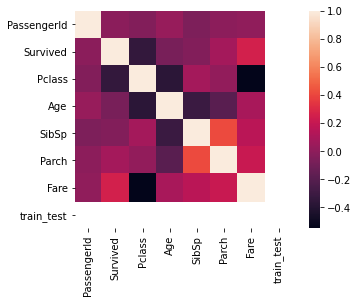

In [8]:
sns.heatmap(train.corr(), square = True)

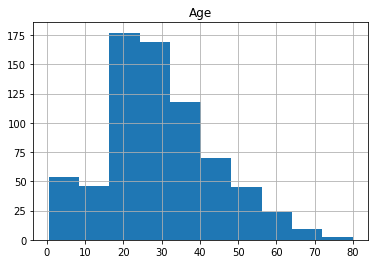

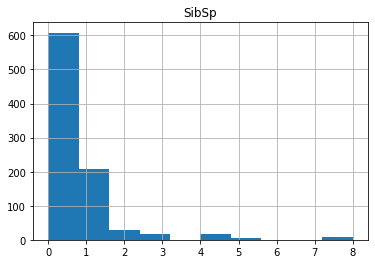

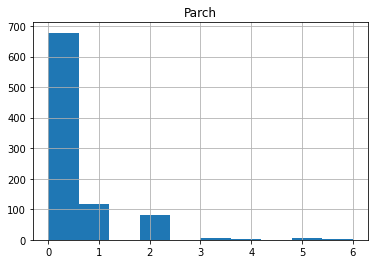

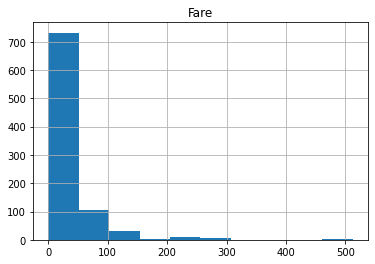

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [9]:
#Numerical attributes = Age, SibSp, Parch, Fare 
#- to use standard scaler

train_num = train[['Age', 'SibSp', 'Parch', 'Fare']]
# distribution for all numeric variables

for i in train_num.columns:
    plt.hist(train_num[i])
    plt.title(i)
    plt.grid()
    plt.show()


#Unique/Primary key = Name, Ticket, PassengerId
#Fill in NULL values with mean/median??

pd.pivot_table(train, index = 'Survived', values = ['Age', 'SibSp', 'Parch', 'Fare'])

- Median age of passenger is 28 years old
- Many passenger comes alone as 75% of passenger does not bring sibling/spouse/parents/children
- 75% passenger only pays less than 31 for the fare ticket



- As many passengers were in the age of 28. it is logic to think that most of 28 YO passenger survived the crash. 
- Passenger who pay more for the ticket fare is likely to survive the crash. Higher ticket fare is linked to the cabin class. 
- Passenger who bring parents and children were likely to survive
- However, passenger without siblings and spouse were likely to survive


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


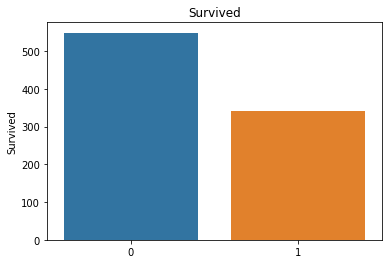

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


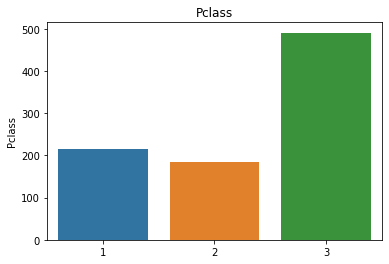

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


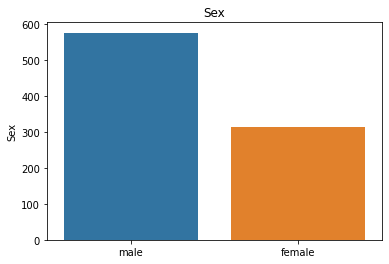

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


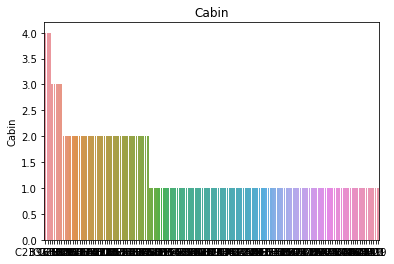

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


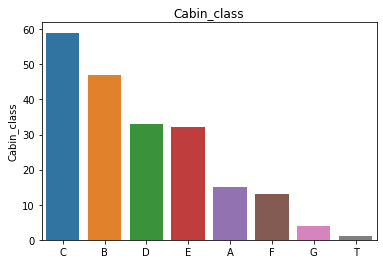

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


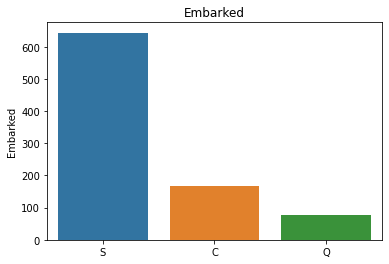

In [10]:
#Categorical attributes = Survived, Pclass, Sex, Cabin, Embarked
#- OneHotEncoder or get_dummies

train_cat = train[['Survived', 'Pclass', 'Sex', 'Cabin','Cabin_class', 'Embarked']]

for i in train_cat.columns:
    sns.barplot(train_cat[i].value_counts().index,train_cat[i].value_counts()).set_title(i)
    plt.show()



Sex      female         male         
Pclass        1   2   3    1   2    3
Survived                             
0             3   6  72   77  91  300
1            91  70  72   45  17   47


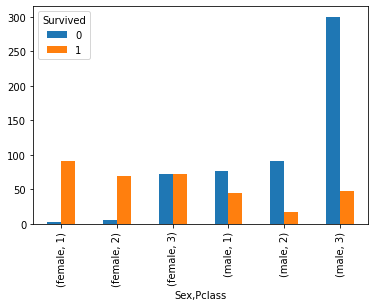

In [11]:
# Survival and each of the categorical variables

Pclass = pd.pivot_table(train, index = 'Survived', columns = ['Sex','Pclass'], values = 'Ticket', aggfunc = 'count')
ax = Pclass.T.plot(kind = 'bar')
print(Pclass)


- 97% female from 1st class survived
- 92% female from 2nd class survived
- 50% female from 3rd class survived



- 39% male from 1st class survived
- 16% male from 2nd class survived
- 13% male from 3rd class survived



You are likely to survive if you are a female in 1st class

Sex         female                                   male                   \
Cabin_class      A     B     C     D     E    F    G    A     B     C    D   
Survived                                                                     
0              NaN   NaN   3.0   NaN   1.0  NaN  2.0  8.0  12.0  21.0  8.0   
1              1.0  27.0  24.0  18.0  14.0  5.0  2.0  6.0   8.0  11.0  7.0   

Sex                          
Cabin_class     E    F    T  
Survived                     
0             7.0  5.0  1.0  
1            10.0  3.0  NaN  


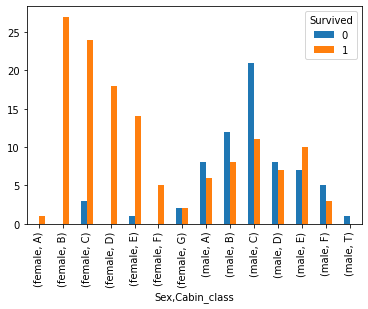

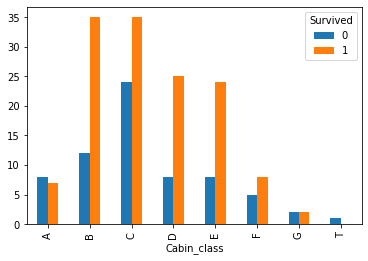

In [12]:
cabin_sex = pd.pivot_table(train, index = 'Survived', columns = ['Sex','Cabin_class'], values = 'Ticket', aggfunc = 'count')
ax2 = cabin_sex.T.plot(kind = 'bar')

print(cabin_sex)

cabin = pd.pivot_table(train, index = 'Survived', columns = ['Cabin_class'], values = 'Ticket', aggfunc = 'count')
ax2 = cabin.T.plot(kind = 'bar')

From sex and cabin class graph, female and male from cabin C have higher chance of not surviving compared to other cabins. 


We may need to look out at the layout of Titanic to know the location for cabin C. Cabin C most probably has a long pathway to emergency exit. 


But after looking at cabin class graph, cabin C has most passengers when compare to other cabins. 


We may say that the congestion of people to go to exit may influence the number of survivals. 

Sex       female  male
Survived              
0             81   468
1            233   109


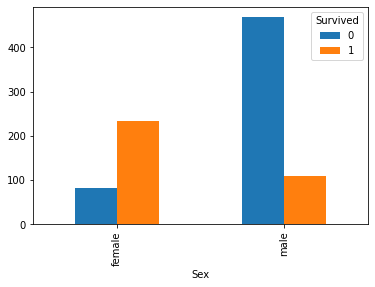

In [13]:
sex = pd.pivot_table(train, index = 'Survived', columns = ['Sex'], values = 'Ticket', aggfunc = 'count')
sex.T.plot(kind='bar')

print(sex)

In [14]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)*100

print("% of women survived:", round(rate_women,2))

% of women survived: 74.2


In [15]:
men = train.loc[train.Sex == 'male']["Survived"]
#print(sum(men), len(men))
rate_men = (sum(men)/len(men)*100)

print('% of men who survived:', round(rate_men, 2))

% of men who survived: 18.89


### Combine data to get maximum data

In [16]:
test = pd.read_csv('test.csv')
test['train_test'] = 0
test['Survived'] = np.NaN
combined = pd.concat([train, test])

pd.set_option('display.max_rows', 2000)

In [17]:
combined['Cabin_class'] = combined['Cabin'].str.slice(stop=1)
#combined['Cabin_class'] = combined.Cabin.apply(lambda x: str(x)[0])

combined

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Cabin_class
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C,1,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S,1,NaN
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S,1,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S,1,NaN
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,NaN
6,7,0.0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S,1,E
7,8,0.0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S,1,NaN
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S,1,NaN
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C,1,NaN


In [18]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
 13  Cabin_class  295 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


#### Data with null values need to be replaced

Age: Median value as mostly are 28 years old

Fare: 1 null -> check out the class and take average amount following the class

Cabin: too much null (1014)

Embarked: 2 null

Cabin class: relying on cabin data

In [19]:
combined.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [20]:
# to find index of null value in column Fare

np.where(combined['Fare'].isnull() == True)
combined.iloc[1043]

PassengerId                  1044
Survived                      NaN
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                          NaN
Cabin                         NaN
Embarked                        S
train_test                      0
Cabin_class                   NaN
Name: 152, dtype: object

Fare of the ticket is according to Pclass

In [21]:
Fare_class = round(combined.loc[combined.Pclass == 3]['Fare'].median(), 2)
Fare_class

8.05

In [22]:
# to fill in null value in column cabin following Pclass or Fare

Rough ideas. 

Get range of fare in each cabin_class and Pclass.
See if from the fare, where we can categorized the cabin_class.
Predict the cabin class? then predict the survival?


In [23]:
print(combined.groupby(['Pclass']).median().reset_index())


   Pclass  PassengerId  Survived   Age  SibSp  Parch     Fare  train_test
0       1          670       1.0  39.0      0      0  60.0000           1
1       2          671       0.0  29.0      0      0  15.0458           1
2       3          644       0.0  24.0      0      0   8.0500           1


Pclass          1     2    3
Cabin_class                 
A            22.0   NaN  NaN
B            65.0   NaN  NaN
C            94.0   NaN  NaN
D            40.0   6.0  NaN
E            34.0   4.0  3.0
F             NaN  13.0  8.0
G             NaN   NaN  5.0
T             1.0   NaN  NaN


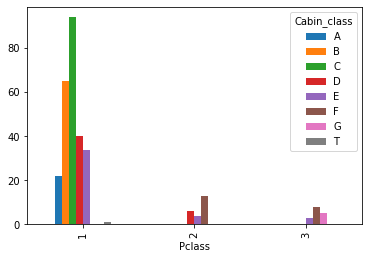

In [24]:
pclass_cabin = pd.pivot_table(combined, index = 'Cabin_class', columns = ['Pclass'], values = 'Ticket', aggfunc = 'count')
pclass_cabin.T.plot(kind='bar')

print(pclass_cabin)

In [25]:
combined['Age'] = combined['Age'].fillna(train['Age'].median())
combined['Fare'] = combined['Fare'].fillna(Fare_class, inplace = False)
#combined['Cabin_class'] = combined['Cabin_class'].fillna(fillin_cabin(combined['Pclass'], inplace = True)


In [26]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
 13  Cabin_class  295 non-null    object 
dtypes: float64(3), int64(5), object(6)
memory usage: 153.4+ KB


In [27]:
# created dummy variables from categories (can use OneHotEncoder too)

features = ["Age", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Cabin_class","Fare", "train_test"]
all_dummies = pd.get_dummies(combined[features])

In [28]:
# split train test 

x_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis = 1)
x_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis = 1)

In [29]:
y_train = combined[combined.train_test == 1].Survived
y_train.shape

(891,)

In [30]:
# Scale data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

all_dummies_scaled = all_dummies.copy()
all_dummies_scaled[['Age', 'SibSp', 'Parch', 'Fare']] = sc.fit_transform(all_dummies_scaled[['Age', 'SibSp', 'Parch', 'Fare']])
all_dummies_scaled

x_train_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 1].drop(['train_test'], axis = 1)
x_test_scaled = all_dummies_scaled[all_dummies_scaled.train_test == 0].drop(['train_test'], axis = 1)

y_train = combined[combined.train_test == 1].Survived

## Naive Bayes

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [34]:
gnb = GaussianNB()
cv = cross_val_score(gnb, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.68715084 0.70224719 0.6741573  0.67977528 0.74719101]
0.6981043249011362


## Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78212291 0.80337079 0.78089888 0.78089888 0.80898876]
0.7912560416797438


In [37]:
lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.78212291 0.80337079 0.78089888 0.78089888 0.80898876]
0.7912560416797438


## Decision Tree Classifier

In [39]:
from sklearn import tree

In [40]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, x_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.74860335 0.79213483 0.79775281 0.76404494 0.80337079]
0.7811813445483649


In [41]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.75418994 0.78651685 0.79775281 0.76404494 0.80337079]
0.7811750674785011


## K Nearest Neighbor (KNN)

In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.68156425 0.67977528 0.70786517 0.74157303 0.73595506]
0.7093465570271797


In [45]:
knn = KNeighborsClassifier()
cv = cross_val_score(knn, x_train_scaled, y_train, cv = 5)
print(cv)
print(cv.mean())

[0.80446927 0.78089888 0.82022472 0.8258427  0.84269663]
0.8148264390182662


## Random Forest 

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.77653631 0.78651685 0.83146067 0.76966292 0.83707865]
0.8002510827945516


In [48]:
rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.78212291 0.78089888 0.83146067 0.76966292 0.83707865]
0.8002448057246877


## Support Vector Classifier

In [49]:
from sklearn.svm import SVC

In [51]:
svc = SVC(probability = True)
cv = cross_val_score(svc, x_train, y_train, cv=5)
print(cv)
print(cv.mean())

[0.58659218 0.71348315 0.69101124 0.68539326 0.69101124]
0.6734982110350888


In [52]:
svc = SVC(probability = True)
cv = cross_val_score(svc, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

[0.83240223 0.8258427  0.81460674 0.80898876 0.85393258]
0.827154604230745


## Xtreme Gradient Boosting

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb = XGBClassifier(random_state = 1)
cv = cross_val_score(xgb, x_train_scaled, y_train, cv=5)
print(cv)
print(cv.mean())

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


[00:56:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:56:52] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be